In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation,Lambda,Flatten,Conv2D,MaxPool2D
from keras.optimizers import Adam , RMSprop
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [1]:
train=pd.read_csv("train.csv")
print(train.shape)
train.head()

NameError: name 'pd' is not defined

In [2]:
test=pd.read_csv("test.csv")
print(test.shape)
test.head()

NameError: name 'pd' is not defined

In [12]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train

NameError: name 'train' is not defined

In [13]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

NameError: name 'X_train' is not defined

In [14]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

NameError: name 'X_train' is not defined

In [15]:
#One Hot Encoding 
#I guess everybody knows this otherwise google

from keras.utils.np_utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=10)

NameError: name 'Y_train' is not defined

In [16]:

Y_train.shape

NameError: name 'Y_train' is not defined

In [17]:
np.random.seed(34)

In [18]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=29)

NameError: name 'X_train' is not defined

In [19]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

NameError: name 'X_train' is not defined

In [20]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

W0922 21:58:56.089930  6460 deprecation_wrapper.py:119] From C:\Users\Swift 3\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0922 21:58:56.170220  6460 deprecation_wrapper.py:119] From C:\Users\Swift 3\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0922 21:58:56.190192  6460 deprecation_wrapper.py:119] From C:\Users\Swift 3\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0922 21:58:56.266115  6460 deprecation_wrapper.py:119] From C:\Users\Swift 3\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0922 21:58:56.270074  6460 deprecation_wrapper.py:119] From C:\Users\S

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [22]:
optimizer=RMSprop(lr=0.001,rho=0.9)

In [23]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

W0922 21:59:26.384779  6460 deprecation_wrapper.py:119] From C:\Users\Swift 3\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0922 21:59:26.438779  6460 deprecation_wrapper.py:119] From C:\Users\Swift 3\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [24]:
from keras.callbacks import ReduceLROnPlateau

In [25]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [26]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [27]:
#without data augmentation

history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_val,Y_val),verbose=2)

NameError: name 'X_train' is not defined

NameError: name 'history' is not defined

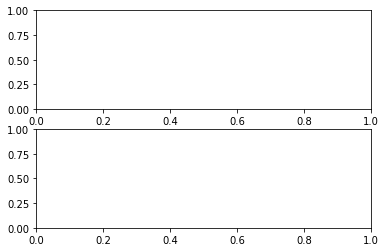

In [28]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [29]:
preds=model.predict_classes(test,verbose=0)

NameError: name 'test' is not defined

In [30]:
subs=pd.DataFrame({"ImageId":list(range(1,len(preds)+1)),"Label":preds})
subs.to_csv("sub_cnn_1.csv",index=False,header=True)

NameError: name 'preds' is not defined